# Polynomial Regression

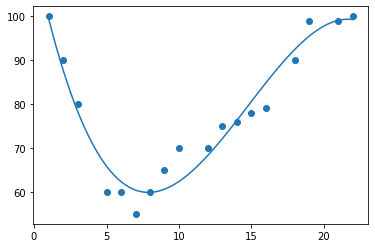

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [49]:
mymodel

poly1d([-3.03208795e-02,  1.34333191e+00, -1.55383039e+01,  1.13768037e+02])

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
X = np.arange(6).reshape(3, 2)

In [52]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [53]:
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

# Ridge Regression

In [54]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np

In [55]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

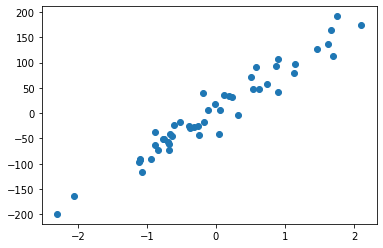

In [56]:
plt.scatter(X, y)

In [57]:
rr = Ridge(alpha=1)
rr.fit(X, y)
w = rr.coef_
w

array([83.16318084])

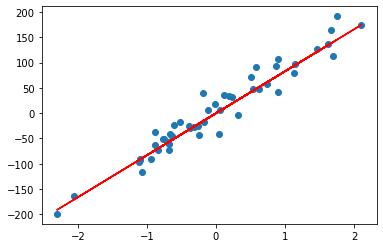

In [58]:
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

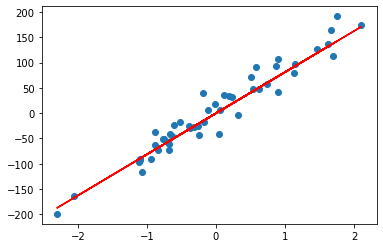

In [59]:
rr = Ridge(alpha=2)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

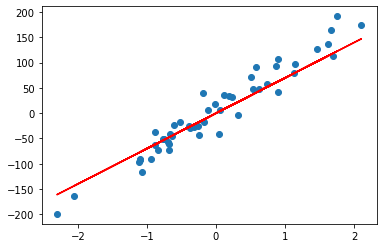

In [60]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

In [61]:
rr.coef_

array([70.03334293])

## Implement function
`fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

In [62]:
def fit_1d_ridge_regression(X, y, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    #TODO
    X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
    # number of columns in matrix of X including intercept
    dimension = X_with_intercept.shape[1]
    # Identity matrix of dimension compatible with our X_intercept Matrix
    A = np.identity(dimension)
    # set first 1 on the diagonal to zero so as not to include a bias term for the intercept
    # We create a bias term corresponding to alpha for each column of X not including the intercept
    A[0, 0] = 0
    A_biased = lmb * A
    beta = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept) + A_biased).dot(X_with_intercept.T).dot(y)
    return beta




In [63]:
w = fit_1d_ridge_regression(X, y, 0.1)

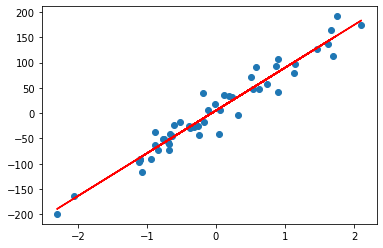

In [64]:
plt.scatter(X, y)
plt.plot(X, w[0]+w[1]*X, c='red')

In [67]:
def fit_1d_lasso_regression(X, y, n_iterations = 1000, learning_rate = 0.1, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """    
    X = X - X.mean(axis=0)
    beta = np.random.randn(X.shape[1], 1).flatten()
    while n_iterations:
        derivatives = np.array([-1 if i <= 0 else 1 for i in beta])
        beta = beta - learning_rate*(2/X.shape[0]* X.T.dot(X.dot(beta) - y) + lmb*derivatives)
        n_iterations -= 1
    return y.mean(), np.array(beta)

    

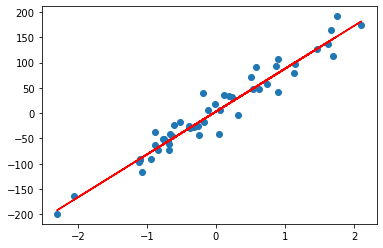

In [68]:
for lmb in range(200, 0, -10):
    w = fit_1d_lasso_regression(X, y, learning_rate=0.01, lmb=0.0001)
    plt.scatter(X, y)
    plt.plot(X, w[0]+w[1]*X, c='red')
    plt.show()
    break

## Apply your implemented lasso and ridge regression functions to the data

In [69]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [70]:
X = dataframe[dataframe.columns.difference([13])]
y = dataframe[13]

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
beta = fit_1d_ridge_regression(X_train, y_train)
beta

array([ 2.51040992e+01, -1.09234061e-01,  3.22706863e-02,  7.49805942e-03,
        2.54546998e+00, -9.53795159e+00,  4.46450537e+00, -1.21910176e-02,
       -1.33870040e+00,  2.48881816e-01, -1.14746211e-02, -8.28604284e-01,
        1.26421124e-02, -5.23833016e-01])

In [73]:
beta = fit_1d_lasso_regression(X_train, y_train, n_iterations=1000, learning_rate=0.00001, lmb=1)
beta

(22.79653465346535,
 array([-0.26941113,  0.16549586,  0.51520386, -0.22805159, -1.02174476,
        -1.00092798, -0.07875985, -1.7544229 ,  0.70737342, -0.05432324,
        -0.22498922,  0.01555526, -0.26038366]))

### tunning ridge hyperparametr

In [74]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.model_selection import RepeatedKFold

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.379
Config: {'alpha': 0.51}


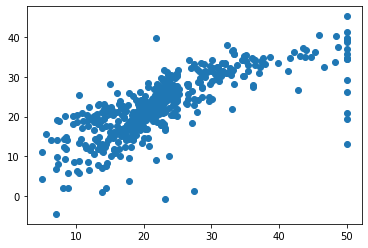

In [75]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions)

## Implement GridSearchCV using numpy 

In [82]:
import numpy as np

# ___Import Everything you need.
# ___For Example:

from sklearn import metrics
from inspect import signature
from itertools import product
from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split

# class MyGridSearchCV:
    
#     def __init__(self, estimator, param_grid: dict, scoring=None, refit=True, cv=None):
#         self.estimator = estimator
#         self.param_grid = param_grid
#         self.scoring = scoring
#         self.refit = refit
#         if cv is None:
#             self.cv = KFold()
#         else:
#             self.cv = cv
            
#             # TODO

#     def fit(self, X, y):
        
#         X, y = np.array(X), np.array(y)
        
#         # TODO
        
#         return self
    

class MyGridSearchCV:
    
    def __init__(self, estimator, param_grid: dict, scoring=None, refit=True, cv=None):
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring
        self.refit = refit
        if cv is None:
            self.cv = KFold()
        else:
            self.cv = cv
            
        scoring_dict = {'explained_variance': metrics.explained_variance_score,
                        'max_error': metrics.max_error,
                        'neg_mean_absolute_error': metrics.mean_absolute_error,
                        'neg_mean_squared_error': metrics.mean_squared_error,
                        'neg_root_mean_squared_error': metrics.mean_squared_error, 
                        'neg_mean_squared_log_error': metrics.mean_squared_log_error,
                        'neg_median_absolute_error': metrics.median_absolute_error,
                        'r2': metrics.r2_score,
                        'neg_mean_poisson_deviance': metrics.mean_poisson_deviance,
                        'neg_mean_gamma_deviance': metrics.mean_gamma_deviance}
        
        if self.scoring is not None:
            assert(self.scoring in scoring_dict.keys()),'no such scoring: ' + str(self.scoring) + '.'
            self.scoring = scoring_dict[scoring]
            
        model = estimator.__init__

        sig = signature(model)

        for i in self.param_grid.keys():
            assert(i in sig.parameters.keys()), type(estimator).__name__ + " object has no argument like: " + str(i) 
         

    def fit(self, X, y):
        
        X, y = np.array(X), np.array(y)
        
        all_list = [list(i) for i in self.param_grid.values()]

        permutations = list(product(*all_list)) 

        parameters = list()
        for i in permutations:
            permutation_dict = dict()
            for ind, val in enumerate(i):
                permutation_dict[list(self.param_grid.keys())[ind]] = val
            parameters.append(permutation_dict)

        scores = list()
        for param_dict in parameters:
            for param in list(self.estimator.get_params().keys()):
                if param in param_dict:
                    self.estimator.__setattr__(param, param_dict[param])
            scr = list()
            for train_index, test_index in cv.split(X):
                xTrain, xTest, yTrain, yTest = X[train_index], X[test_index], y[train_index], y[test_index]
                self.estimator.fit(xTrain, yTrain)
                y_pred = self.estimator.predict(xTest)
                if self.scoring is not None:
                    scr.append(self.scoring(y_pred, yTest))
                else:
                    scr.append(self.estimator.score(xTest, yTest))
            scores.append(np.mean(scr))
        scores = np.array(scores)
        self.best_score_ = np.min(scores)
        self.best_params_ = parameters[np.where(scores == np.min(scores))[0][0]]
        
        if self.refit:
            for param in list(self.estimator.get_params().keys()):
                if param in param_dict:
                    self.estimator.__setattr__(param, self.best_params_[param])
            
            self.predict = self.estimator.predict
        
        return self

In [83]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = MyGridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 3.379
Config: {'alpha': 0.51}


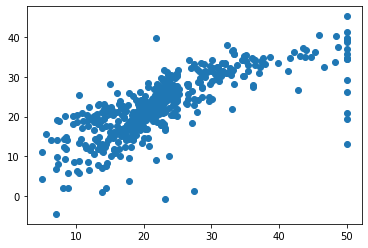

In [84]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions)

In [85]:
y_pred = results.predict(X)
print('MAE: %.3f' % metrics.mean_absolute_error(y_pred, y))

MAE: 3.301
